# Preventing credit card defaults with neural networks

In [1]:
# Initial imports
from path import Path
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Read in data
file_path = Path("./Resources/cc_default.csv")
df = pd.read_csv(file_path)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Define the features set X by including all the columns of the DataFrame except the DEFAULT column.

In [3]:
# Define features data
X = df.copy()
X = X.drop(columns=["DEFAULT"])
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


# Create the target vector y by assigning the values of the DEFAULT column of the DataFrame.

In [4]:
# Define target data
y = df["DEFAULT"].values
y = y.reshape(-1, 1)
y

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [5]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create the scaler instance
X_scaler = StandardScaler()
# Fit the scaler
X_scaler.fit(X_train)
# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
## Create a neural network model with 23 inputs, one hidden layer with 69 units, 
## and an output layer with a single output. 
## Use the relu activation function for the first layer and sigmoid for the second layer.
# Define the model
number_inputs = 23
number_hidden_nodes = 69

nn = Sequential()
# 19.3.1 explains activation functions
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="relu"))
nn.add(Dense(1, activation="sigmoid"))

In [10]:
# Compile model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model
model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
704/704 [==============================] - 1s 807us/step - loss: 0.5288 - accuracy: 0.7532
Epoch 2/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4427 - accuracy: 0.8196
Epoch 3/100
704/704 [==============================] - 1s 900us/step - loss: 0.4439 - accuracy: 0.8165
Epoch 4/100
704/704 [==============================] - 1s 885us/step - loss: 0.4469 - accuracy: 0.8144
Epoch 5/100
704/704 [==============================] - 1s 947us/step - loss: 0.4400 - accuracy: 0.8161
Epoch 6/100
704/704 [==============================] - 1s 900us/step - loss: 0.4348 - accuracy: 0.8164
Epoch 7/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4320 - accuracy: 0.8197
Epoch 8/100
704/704 [==============================] - 1s 1ms/step - loss: 0.4316 - accuracy: 0.8187
Epoch 9/100
704/704 [==============================] - 1s 966us/step - loss: 0.4213 - accuracy: 0.8231
Epoch 10/100
704/704 [==============================] - 1s 989us/step - loss: 0

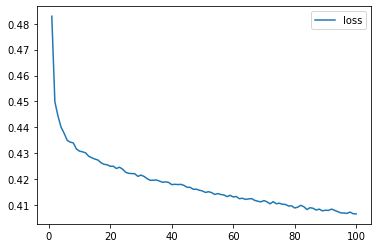

In [12]:
# Plot the loss function and accuracy.
# Create a dataframe with the history dictionary
df_plot = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))
# Plot the loss
df_plot.plot(y="loss")

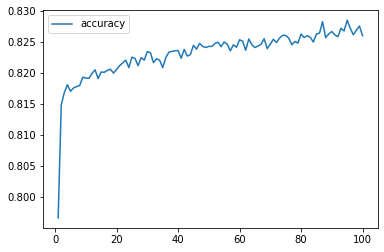

In [13]:
# Plot the accuracy
df_plot.plot(y="accuracy")

In [14]:
# Evaluate the model fit with linear dummy data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

235/235 - 0s - loss: 0.4438 - accuracy: 0.8140
Loss: 0.4438239634037018, Accuracy: 0.8140000104904175
